**Data Preprocessing**

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image

In [ ]:
def fetch_data(folder_path, label):
    # Create a list to store DataFrames
    dataframes = []

    image_data = pd.DataFrame(columns=['Label', 'Image'])

    # List files in the folder
    image_files = os.listdir(folder_path)

    # Loop through image files
    for filename in image_files:
        file_path = os.path.join(folder_path, filename)
        image = Image.open(file_path)

        # Convert the image to grayscale
        gray_image = image.convert('L')

        # Resize the grayscale image to 64x64
        resized_image = gray_image.resize((64, 64))

        # Convert the resized image to a 2D numpy array
        image_array = np.array(resized_image)

        image_array = image_array.reshape((64, 64, 1))

        #print(image_array.shape)

        # Normalize pixel values if needed (divide by 255)
        #image_array = image_array / 255.0

        # Create a DataFrame for each image
        image_df = pd.DataFrame({'Label': [label], 'Image': [image_array]})
        dataframes.append(image_df)

    # Concatenate all DataFrames in the list
    image_data = pd.concat(dataframes, ignore_index=True)
    return image_data


In [ ]:
nldf = fetch_data('/content/drive/MyDrive/train/normal', 'Normal')
aldf = fetch_data('/content/drive/MyDrive/train/pneumonia', 'Pneumonia')


print(nldf.head())
print(aldf.head())

    Label                                              Image
0  Normal  [[[20], [30], [37], [42], [43], [40], [33], [2...
1  Normal  [[[99], [113], [116], [137], [167], [155], [14...
2  Normal  [[[1], [32], [76], [113], [119], [124], [152],...
3  Normal  [[[73], [88], [98], [119], [157], [137], [149]...
4  Normal  [[[71], [82], [90], [94], [94], [91], [85], [7...
       Label                                              Image
0  Pneumonia  [[[24], [35], [46], [58], [74], [62], [63], [6...
1  Pneumonia  [[[51], [58], [53], [53], [55], [42], [42], [4...
2  Pneumonia  [[[144], [141], [149], [147], [143], [126], [1...
3  Pneumonia  [[[42], [38], [24], [47], [69], [59], [64], [6...
4  Pneumonia  [[[60], [74], [109], [91], [110], [113], [79],...


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.concat([nldf, aldf], ignore_index=True)
data = data.sample(frac=1)

label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])
print(label_encoder.classes_)

data = data.dropna()

print(data.head())

['Normal' 'Pneumonia']
     Label                                              Image
61       0  [[[74], [72], [61], [51], [47], [44], [39], [3...
100      1  [[[97], [106], [49], [55], [68], [70], [77], [...
392      1  [[[43], [48], [49], [47], [48], [52], [41], [4...
303      1  [[[7], [15], [24], [33], [49], [73], [91], [95...
558      1  [[[27], [27], [26], [24], [25], [20], [17], [1...


**Data exploration**

In [ ]:
print(data.head())

     Label                                              Image
61       0  [[[74], [72], [61], [51], [47], [44], [39], [3...
100      1  [[[97], [106], [49], [55], [68], [70], [77], [...
392      1  [[[43], [48], [49], [47], [48], [52], [41], [4...
303      1  [[[7], [15], [24], [33], [49], [73], [91], [95...
558      1  [[[27], [27], [26], [24], [25], [20], [17], [1...


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf

In [ ]:
X = data.drop(columns='Label')
X = np.stack(X['Image'].values)

y = data['Label'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
display(X_train.shape)
display(X_test.shape)

(475, 64, 64, 1)

(119, 64, 64, 1)

**Model development**

Using Convolutional Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten, LeakyReLU, Rescaling

In [ ]:
# Resahping X_train and X_test to match the CNN input format
model = Sequential()

MYACTIVATIONFXN = 'relu'

# Rescaling
model.add(Rescaling(1./255, input_shape=(64, 64, 1)))

# Convolutional layers
model.add(Conv2D(32, kernel_size=3, activation=MYACTIVATIONFXN))
model.add(MaxPooling2D())
model.add(Conv2D(64, kernel_size=3, activation=MYACTIVATIONFXN))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation=MYACTIVATIONFXN))
model.add(Dense(64, activation=MYACTIVATIONFXN))
model.add(Dense(32, activation=MYACTIVATIONFXN))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')

In [ ]:
model.fit(X_train, y_train, batch_size = 1, epochs = 50)

Epoch 1/50
475/475 [==============================] - 8s 15ms/step - loss: 0.4359
Epoch 2/50
475/475 [==============================] - 6s 12ms/step - loss: 0.1718
Epoch 3/50
475/475 [==============================] - 7s 14ms/step - loss: 0.1391
Epoch 4/50
475/475 [==============================] - 6s 13ms/step - loss: 0.1463
Epoch 5/50
475/475 [==============================] - 8s 17ms/step - loss: 0.1248
Epoch 6/50
475/475 [==============================] - 12s 25ms/step - loss: 0.1212
Epoch 7/50
475/475 [==============================] - 7s 14ms/step - loss: 0.1211
Epoch 8/50
475/475 [==============================] - 7s 14ms/step - loss: 0.0917
Epoch 9/50
475/475 [==============================] - 6s 12ms/step - loss: 0.0579
Epoch 10/50
475/475 [==============================] - 7s 14ms/step - loss: 0.1090
Epoch 11/50
475/475 [==============================] - 6s 12ms/step - loss: 0.0539
Epoch 12/50
475/475 [==============================] - 6s 14ms/step - loss: 0.1135
Epoch 13/50


In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

4/4 [==============================] - 0s 23ms/step


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(y_pred_train)
print(y_pred_test)

[[5.01096387e-10]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [3.75870307e-11]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [3.44763009e-07]
 [1.29620463e-13]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [3.30845140e-14]
 [1.00000000e+00]
 [1.00000000e+00]
 [8.00761540e-11]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [3.08733697e-13]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.11588234e-12]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.000000

In [ ]:
y_pred_train = [ 1 if y>=0.5 else 0 for y in y_pred_train ]
y_pred_test = [ 1 if y>=0.5 else 0 for y in y_pred_test ]

print("Training Accuracy: ")
print(accuracy_score(y_train, y_pred_train))

print("Testing Accuracy: ")
print(accuracy_score(y_test, y_pred_test))

Training Accuracy: 
1.0
Testing Accuracy: 
0.9831932773109243


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00       407

    accuracy                           1.00       475
   macro avg       1.00      1.00      1.00       475
weighted avg       1.00      1.00      1.00       475



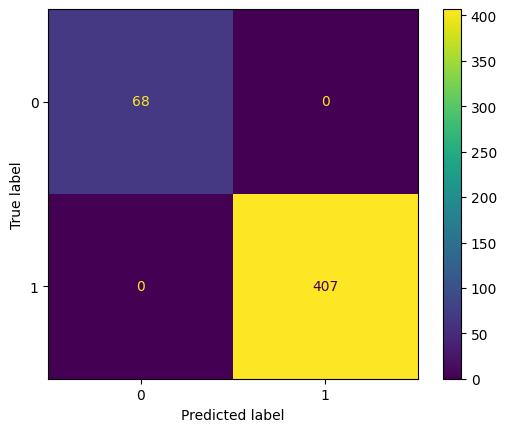

In [ ]:
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

mycmdisp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train)
mycmdisp.plot()

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.98      0.99       103

    accuracy                           0.98       119
   macro avg       0.94      0.99      0.97       119
weighted avg       0.99      0.98      0.98       119



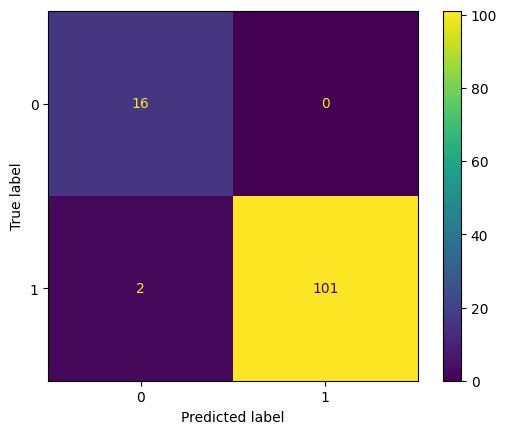

In [ ]:
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

mycmdisp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test)
mycmdisp.plot()